<a href="https://colab.research.google.com/github/IshanKapadia-Data/Predicting-BankChurn/blob/main/Predicting_BankCustomerChurn_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB
None

=== Summary Statistics ===
        customer_id  credit_score           age        tenure        balance  \
count  1.000000e+04  10000.000000  

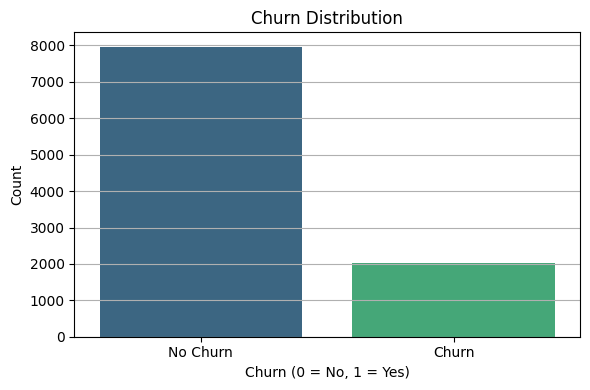

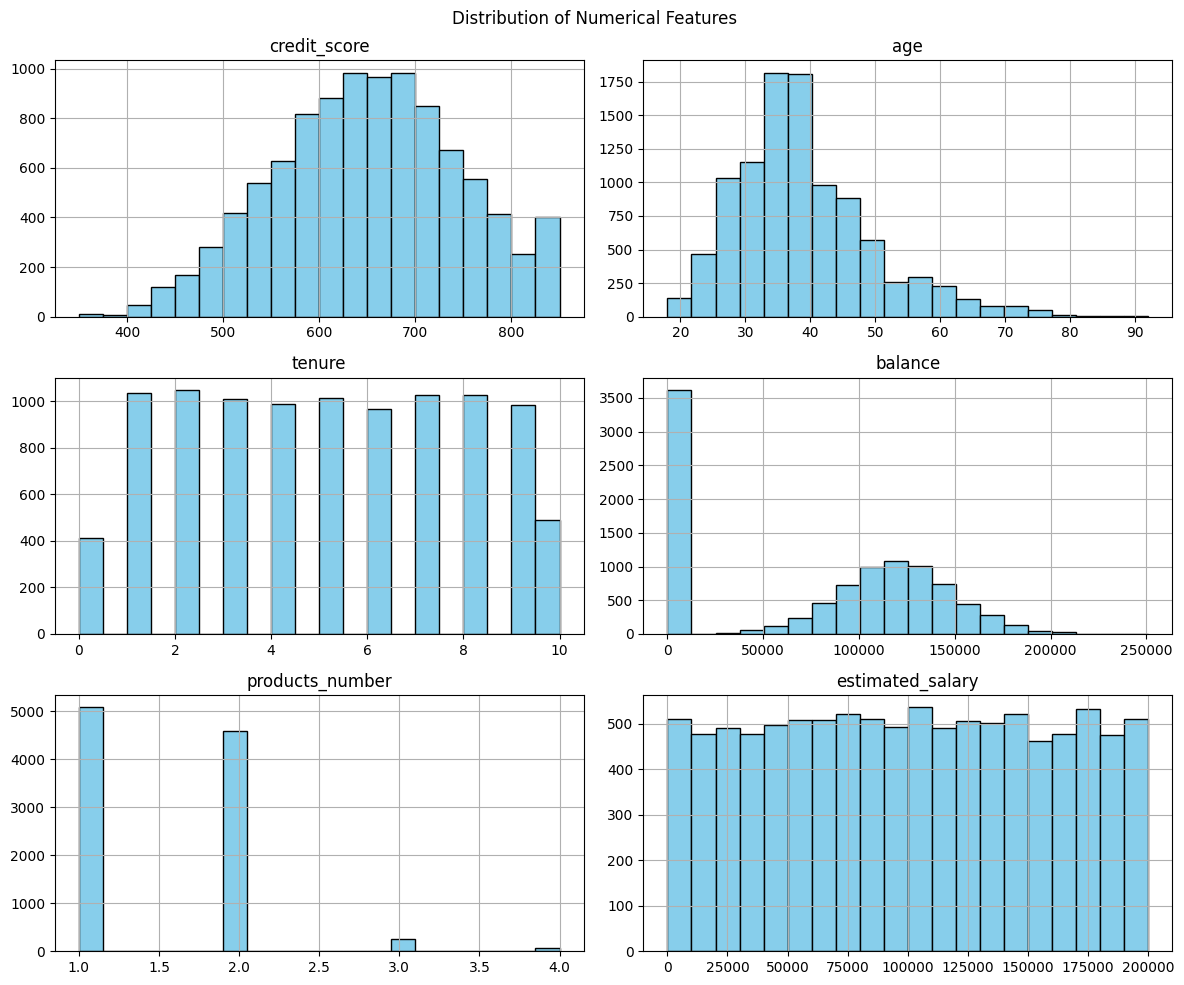

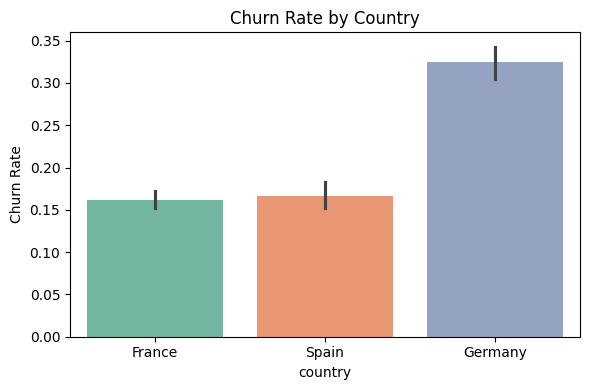

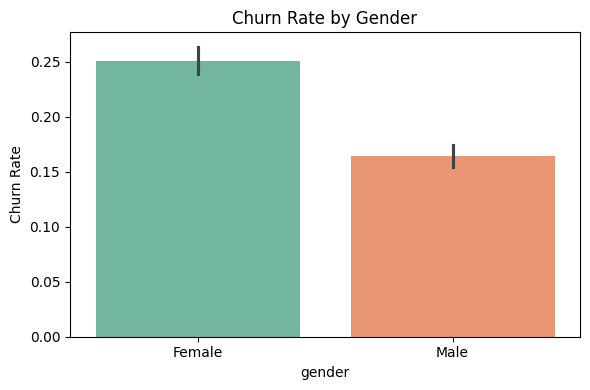

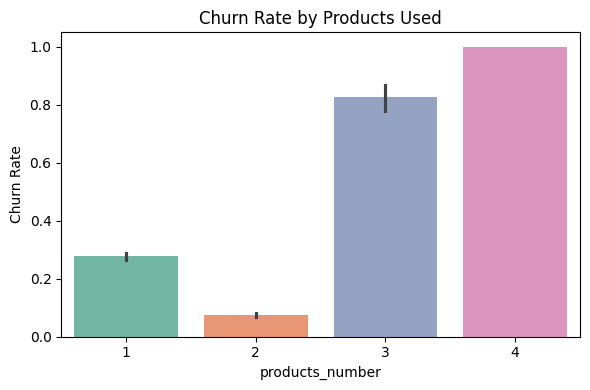

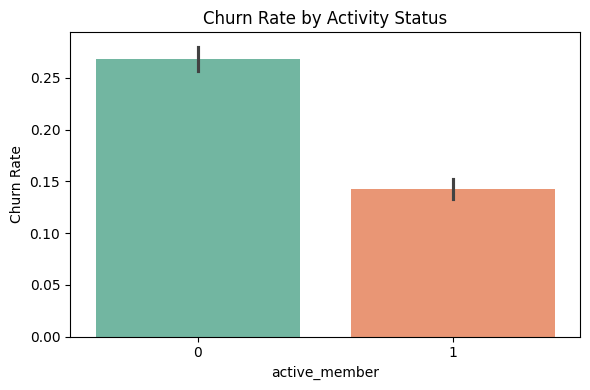

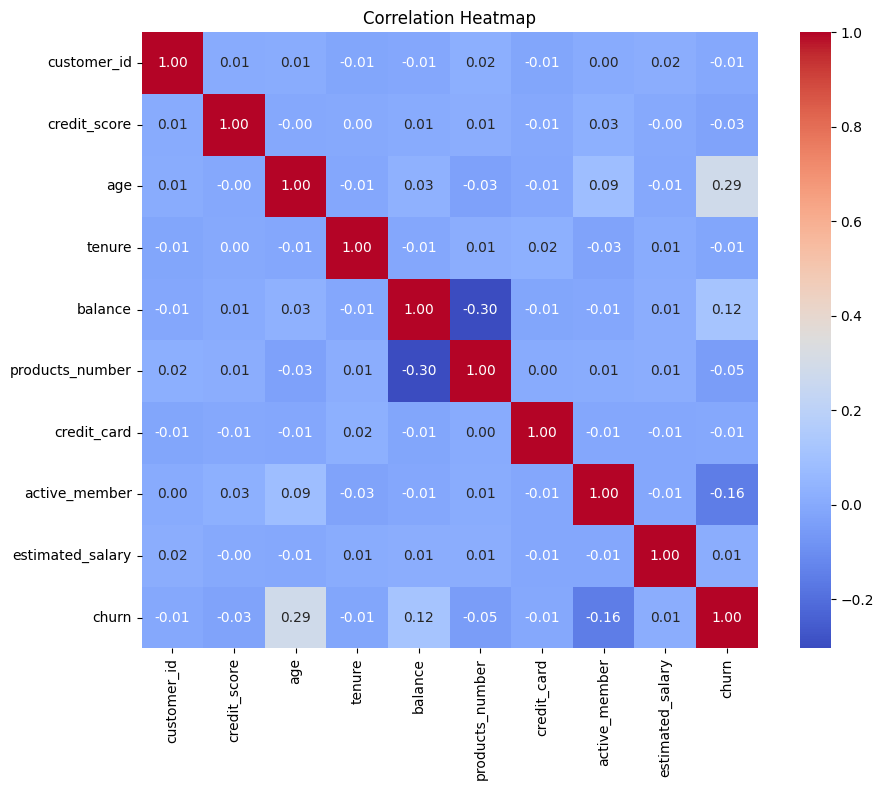

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)

df = pd.read_csv("Bank Customer Churn Prediction.csv")

print("\n=== Dataset Info ===")
print(df.info())

print("\n=== Summary Statistics ===")
print(df.describe())

print("\n=== Missing Values ===")
print(df.isnull().sum())

# Plot churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=df, hue='churn', palette='viridis', legend=False)
plt.title('Churn Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Histograms for numerical features
num_cols = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']
df[num_cols].hist(bins=20, figsize=(12, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features")
plt.tight_layout()
plt.show()

# Churn rate by Country
plt.figure(figsize=(6, 4))
sns.barplot(x='country', y='churn', data=df, hue='country', palette='Set2', legend=False)
plt.title("Churn Rate by Country")
plt.ylabel("Churn Rate")
plt.tight_layout()
plt.show()

# Churn rate by Gender
plt.figure(figsize=(6, 4))
sns.barplot(x='gender', y='churn', data=df, hue='gender', palette='Set2', legend=False)
plt.title("Churn Rate by Gender")
plt.ylabel("Churn Rate")
plt.tight_layout()
plt.show()

# Churn rate by Number of Products
plt.figure(figsize=(6, 4))
sns.barplot(x='products_number', y='churn', data=df, hue='products_number', palette='Set2', legend=False)
plt.title("Churn Rate by Products Used")
plt.ylabel("Churn Rate")
plt.tight_layout()
plt.show()

# Churn rate by Active Member
plt.figure(figsize=(6, 4))
sns.barplot(x='active_member', y='churn', data=df, hue='active_member', palette='Set2', legend=False)
plt.title("Churn Rate by Activity Status")
plt.ylabel("Churn Rate")
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


In [30]:
# Drop customer_id
df_model = df.drop(columns=["customer_id"])

# One-hot encode categorical features
df_encoded = pd.get_dummies(df_model, columns=["country", "gender"], drop_first=True)

# Separate features and target
X = df_encoded.drop(columns=["churn"])
y = df_encoded["churn"]

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=31, stratify=y
)

# Feature scaling for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Show output shapes and features
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")


X_train shape: (8000, 11)
X_test shape: (2000, 11)



Logistic Regression Metrics:
Accuracy: 0.7120
Precision: 0.3844
Recall: 0.6904
F1 Score: 0.4938
ROC AUC: 0.7682


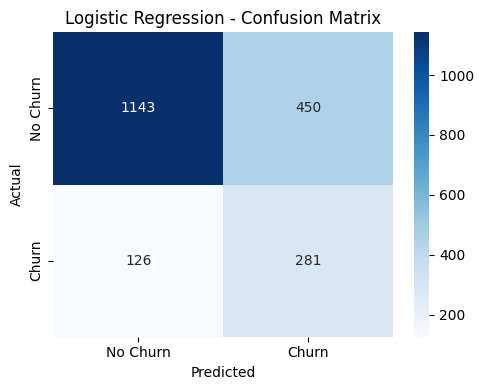

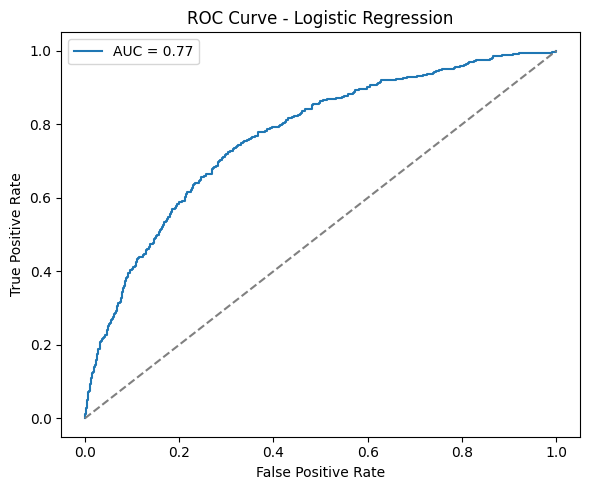

In [31]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=31, stratify=y
)
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression model
log_reg = LogisticRegression(class_weight='balanced', random_state=31)
log_reg.fit(X_train_scaled, y_train)

# Predict
y_pred = log_reg.predict(X_test_scaled)
y_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

# Evaluation metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
conf_mat = confusion_matrix(y_test, y_pred)

# Print metrics
print("\nLogistic Regression Metrics:")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Confusion matrix plot
plt.figure(figsize=(5, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression - Confusion Matrix")
plt.tight_layout()
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.tight_layout()
plt.show()


Random Forest Metrics:
Accuracy: 0.8535
Precision: 0.7336
Recall: 0.4398
F1 Score: 0.5499
ROC AUC: 0.8494


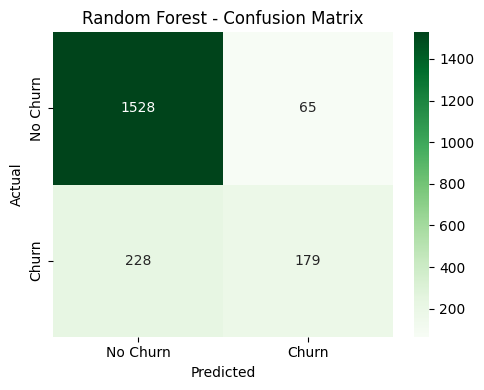

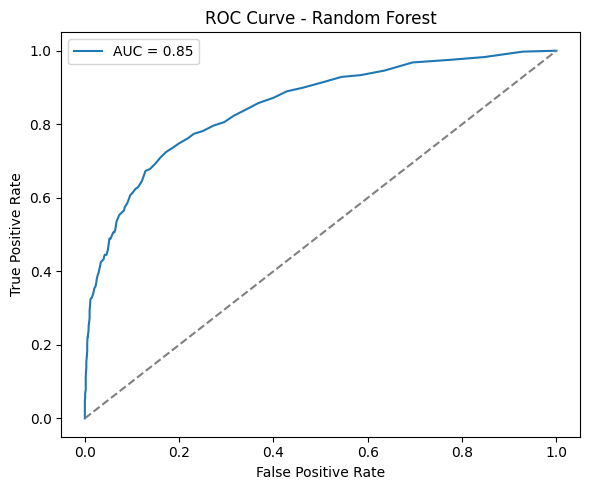

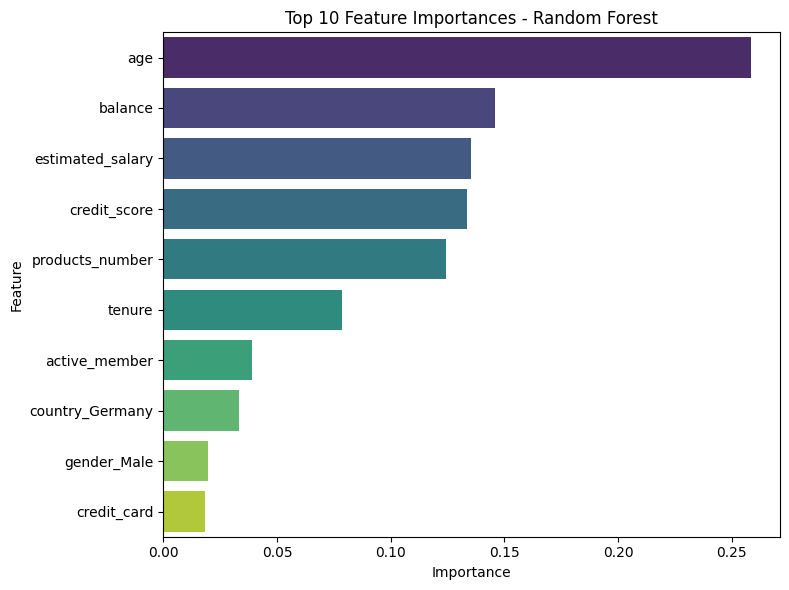

In [32]:
# Preprocessing
df_model = df.drop(columns=["customer_id"])
df_encoded = pd.get_dummies(df_model, columns=["country", "gender"], drop_first=True)

X = df_encoded.drop(columns=["churn"])
y = df_encoded["churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=31, stratify=y
)

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=31)
rf_model.fit(X_train, y_train)

# Predictions
rf_pred = rf_model.predict(X_test)
rf_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluation
rf_acc = accuracy_score(y_test, rf_pred)
rf_prec = precision_score(y_test, rf_pred)
rf_rec = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_roc_auc = roc_auc_score(y_test, rf_proba)
rf_conf_mat = confusion_matrix(y_test, rf_pred)

# Print metrics
print("\nRandom Forest Metrics:")
print(f"Accuracy: {rf_acc:.4f}")
print(f"Precision: {rf_prec:.4f}")
print(f"Recall: {rf_rec:.4f}")
print(f"F1 Score: {rf_f1:.4f}")
print(f"ROC AUC: {rf_roc_auc:.4f}")

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(rf_conf_mat, annot=True, fmt='d', cmap='Greens',
            xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest - Confusion Matrix")
plt.tight_layout()
plt.show()

# ROC Curve
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_proba)
plt.figure(figsize=(6, 5))
plt.plot(rf_fpr, rf_tpr, label=f"AUC = {rf_roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.tight_layout()
plt.show()

# Feature Importance
importances = rf_model.feature_importances_
feature_names = X_train.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Top 10 Features Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', hue='Feature', data=feat_imp_df.head(10), palette='viridis', legend=False)

plt.title("Top 10 Feature Importances - Random Forest")
plt.tight_layout()
plt.show()

In [44]:
print("\n--- Enter Example Customer Details ---")
credit_score = int(input("Credit Score (e.g., 600): "))
country = input("Country (France, Germany, Spain): ").capitalize()
gender = input("Gender (Male/Female): ").capitalize()
age = int(input("Age (e.g., 40): "))
tenure = int(input("Tenure (years with bank, e.g., 3): "))
balance = float(input("Balance (e.g., 60000.0): "))
products_number = int(input("Number of Products (e.g., 2): "))
credit_card = int(input("Has Credit Card? (1 = Yes, 0 = No): "))
active_member = int(input("Is Active Member? (1 = Yes, 0 = No): "))
estimated_salary = float(input("Estimated Salary (e.g., 50000.0): "))

# Create DataFrame from input
user_input = pd.DataFrame([{
    'credit_score': credit_score,
    'country': country,
    'gender': gender,
    'age': age,
    'tenure': tenure,
    'balance': balance,
    'products_number': products_number,
    'credit_card': credit_card,
    'active_member': active_member,
    'estimated_salary': estimated_salary
}])

# One-hot encode user input
user_encoded = pd.get_dummies(user_input, columns=['country', 'gender'], drop_first=True)

# Ensure all model features are present
for col in X.columns:
    if col not in user_encoded.columns:
        user_encoded[col] = 0
user_encoded = user_encoded[X.columns]

# Scale input for logistic regression
user_scaled = scaler.transform(user_encoded)

# Logistic Regression prediction
lr_pred = log_reg.predict(user_scaled)[0]
lr_prob = log_reg.predict_proba(user_scaled)[0][1]

# Random Forest prediction
rf_pred = rf_model.predict(user_encoded)[0]
rf_prob = rf_model.predict_proba(user_encoded)[0][1]

# Output results
print("\n=== Prediction Results ===")
print("Logistic Regression:")
print(f" - Churn Prediction: {'Yes' if lr_pred == 1 else 'No'}")
print(f" - Churn Probability: {lr_prob * 100:.2f}%")

print("\nRandom Forest:")
print(f" - Churn Prediction: {'Yes' if rf_pred == 1 else 'No'}")
print(f" - Churn Probability: {rf_prob * 100:.2f}%")



--- Enter Example Customer Details ---
Credit Score (e.g., 600): 650
Country (France, Germany, Spain): Germany
Gender (Male/Female): Male
Age (e.g., 40): 47
Tenure (years with bank, e.g., 3): 4
Balance (e.g., 60000.0): 1000
Number of Products (e.g., 2): 3
Has Credit Card? (1 = Yes, 0 = No): 1
Is Active Member? (1 = Yes, 0 = No): 1
Estimated Salary (e.g., 50000.0): 90000

=== Prediction Results ===
Logistic Regression:
 - Churn Prediction: No
 - Churn Probability: 40.61%

Random Forest:
 - Churn Prediction: Yes
 - Churn Probability: 87.00%
